# CNN implementation on Dementia Dataset

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2 as cv
import os, sys

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
path1='/content/drive/MyDrive/DementiaDataset/Normal'
path2='/content/drive/MyDrive/DementiaDataset/Dementia'
files1=os.listdir(path1)
files2=os.listdir(path2)
Num_files_N=len(files1)
Num_files_D=len(files2)
print(Num_files_N)
print(Num_files_D)
dataset_len=Num_files_N+Num_files_D

100
100


In [60]:
name=path1+'/'+files1[0]
img=cv.imread(name)
img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
img_gs_r=cv.resize(img_gs,(100,100))

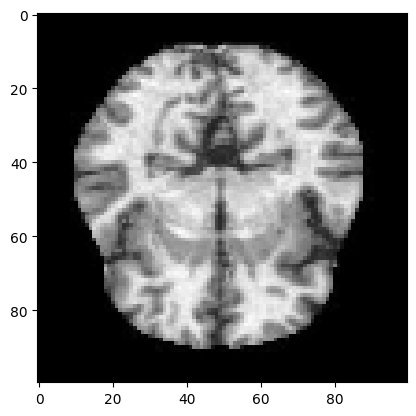

In [61]:
plt.imshow(img_gs_r,cmap='gray')

# Dataset Creation

For every file

1. Read the image
2. Convert it to grayscale (Optional)
3. Resize to (100,100)
4. Preprocessing: Normalization
5. Reshape to (100,100,1)
6. Create the dataset

In [62]:
data=np.zeros((dataset_len,100,100,1))
label=[]
data.shape

(200, 100, 100, 1)

In [63]:
for i in range(Num_files_N):
    name=path1+'/'+files1[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i,:,:]=img_gs
    label.append('Normal')


In [64]:
for i in range(Num_files_D):
    name=path2+'/'+files2[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i+Num_files_N,:,:]=img_gs
    label.append('Dementia')


Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab=le.fit_transform(label)

In [66]:
label

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [67]:
lab

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Train and test dataset spilt

In [68]:
train_images,test_images,train_labels,test_labels=train_test_split(data,lab,test_size=0.2, random_state=1)

In [69]:
train_labels

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1])

In [70]:
print('Train Dataset Size:',np.size(train_labels))
print('Test Dataset Size:',np.size(test_labels))

Train Dataset Size: 160
Test Dataset Size: 40


In [71]:
np.unique(test_labels,return_counts=True)

(array([0, 1]), array([17, 23]))

# Define the CNN architecture

Create the convolutional base

1. Convolutional : 32 filters 3x3
2. Maxpooling: 2x2
3. Convolutional : 64 filters 5x5
4. Convolutional : 32 filters 3x3
5. Maxpooling: 3x3


In [72]:
network=models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(100,100,1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(7,7),activation='relu'))
network.add(layers.Conv2D(32,(3,3),activation='relu'))
network.add(layers.MaxPooling2D((3,3)))

Check summary of convolutional base

In [73]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 64)        100416    
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
Total params: 119,200
Trainable params: 119,200
Non-tr

Build the classifier on top of the convolutional base

In [74]:
network.add(layers.Flatten())
network.add(layers.Dense(80,activation='relu'))
network.add(layers.Dense(50,activation='relu'))
network.add(layers.Dense(2,activation='softmax'))

In [75]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 64)        100416    
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)             

Compile and train the model

In [76]:
network.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
trained_network=network.fit(train_images,train_labels,epochs=25,validation_data=(test_images,test_labels))

Epoch 1/25
5/5 [==============================] - 11s 2s/step - loss: 0.6970 - accuracy: 0.4875 - val_loss: 0.6959 - val_accuracy: 0.4250
Epoch 2/25
5/5 [==============================] - 8s 2s/step - loss: 0.6910 - accuracy: 0.4938 - val_loss: 0.6935 - val_accuracy: 0.4250
Epoch 3/25
5/5 [==============================] - 9s 2s/step - loss: 0.6872 - accuracy: 0.5312 - val_loss: 0.6827 - val_accuracy: 0.7250
Epoch 4/25
5/5 [==============================] - 10s 2s/step - loss: 0.6873 - accuracy: 0.5188 - val_loss: 0.6886 - val_accuracy: 0.4500
Epoch 5/25
5/5 [==============================] - 8s 2s/step - loss: 0.6829 - accuracy: 0.5250 - val_loss: 0.6811 - val_accuracy: 0.7750
Epoch 6/25
5/5 [==============================] - 10s 2s/step - loss: 0.6802 - accuracy: 0.7625 - val_loss: 0.6820 - val_accuracy: 0.6250
Epoch 7/25
5/5 [==============================] - 11s 2s/step - loss: 0.6787 - accuracy: 0.6625 - val_loss: 0.6756 - val_accuracy: 0.8000
Epoch 8/25
5/5 [=====================

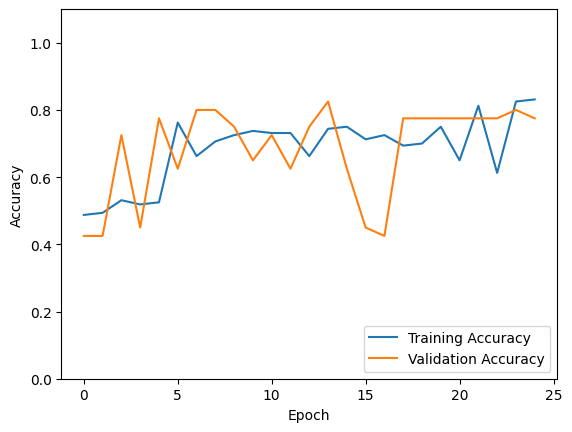

In [78]:
plt.plot(trained_network.history['accuracy'],label='Training Accuracy')
plt.plot(trained_network.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.legend(loc='lower right')

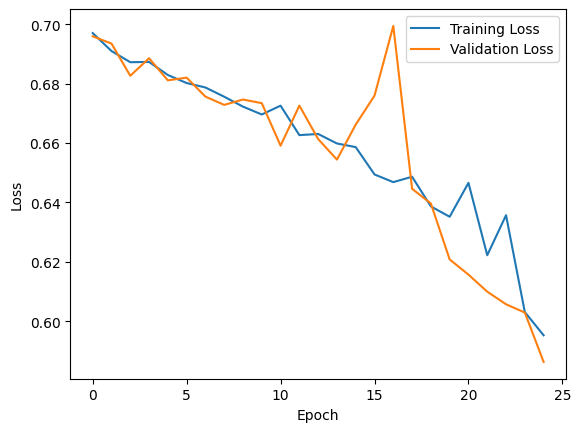

In [79]:
plt.plot(trained_network.history['loss'],label='Training Loss')
plt.plot(trained_network.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

Evaluate the network

In [80]:
test_loss,test_acc=network.evaluate(test_images,test_labels)

2/2 [==============================] - 0s 98ms/step - loss: 0.5863 - accuracy: 0.7750


In [81]:
y_predict=network.predict(test_images)

2/2 [==============================] - 1s 101ms/step


In [82]:
y_predict

array([[0.374917  , 0.62508297],
       [0.5279351 , 0.4720649 ],
       [0.47127947, 0.52872056],
       [0.5496501 , 0.45034984],
       [0.35988036, 0.6401196 ],
       [0.42483065, 0.5751693 ],
       [0.36724147, 0.63275856],
       [0.41150707, 0.58849293],
       [0.4810947 , 0.5189054 ],
       [0.5535151 , 0.44648483],
       [0.47413486, 0.5258652 ],
       [0.5067468 , 0.49325317],
       [0.3169889 , 0.68301105],
       [0.38374546, 0.61625457],
       [0.47241655, 0.5275835 ],
       [0.52708614, 0.47291377],
       [0.5208726 , 0.4791274 ],
       [0.35200694, 0.647993  ],
       [0.46002546, 0.53997463],
       [0.41671893, 0.58328104],
       [0.34850067, 0.65149933],
       [0.37003264, 0.6299674 ],
       [0.34228513, 0.6577149 ],
       [0.34707293, 0.6529271 ],
       [0.33174267, 0.6682573 ],
       [0.5228385 , 0.4771615 ],
       [0.4778066 , 0.5221933 ],
       [0.3167497 , 0.68325025],
       [0.51942027, 0.48057973],
       [0.4415595 , 0.55844045],
       [0.

In [83]:
y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))

In [84]:
y_pred

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0]

In [85]:
print(metrics.confusion_matrix(test_labels,y_pred))

[[10  7]
 [ 2 21]]


In [86]:
print(metrics.accuracy_score(test_labels,y_pred))

0.775
